In [1]:
### 경기도 전입인구, 주택가격, 거래량 상관관계 분석

In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [35]:
file_path = "./data/가공data/2019~2021 경기도 아파트가격 거래량.csv"
df = pd.read_csv(file_path)
df

,Unnamed: 0,경기도시,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
0,0,수원시,311484,396809,499071,30513.0,51903.0,30244.0
1,1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0
2,2,의정부시,232333,240875,330000,15351.0,16435.0,12411.0
3,3,안양시,444364,507285,622496,15941.0,16112.0,15317.0
4,4,부천시,314625,336500,446958,16471.0,17181.0,10733.0
5,5,광명시,475916,585666,701333,6620.0,10638.0,6006.0
6,6,평택시,175750,178583,229833,24648.0,28252.0,22482.0
7,7,동두천시,139541,137083,188291,1400.0,2530.0,3205.0
8,8,안산시,248243,272931,388925,11991.0,22059.0,10236.0
9,9,고양시,332344,367903,497836,23319.0,32680.0,17961.0


In [12]:
df = df.drop(columns=("Unnamed: 0"))
df

,경기도시,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
0,수원시,311484,396809,499071,30513.0,51903.0,30244.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0
2,의정부시,232333,240875,330000,15351.0,16435.0,12411.0
3,안양시,444364,507285,622496,15941.0,16112.0,15317.0
4,부천시,314625,336500,446958,16471.0,17181.0,10733.0
5,광명시,475916,585666,701333,6620.0,10638.0,6006.0
6,평택시,175750,178583,229833,24648.0,28252.0,22482.0
7,동두천시,139541,137083,188291,1400.0,2530.0,3205.0
8,안산시,248243,272931,388925,11991.0,22059.0,10236.0
9,고양시,332344,367903,497836,23319.0,32680.0,17961.0


In [9]:
file_path2 = "./data/가공data/경기도전입인구(정제).csv"
df_ingu = pd.read_csv(file_path2)
df_ingu

,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,가평군,7554.0,7550.0,8800.0,7452.0,7590.0,7795.0,7570.0,7449.0,7438.0,6886.0,7288.0,7508.0
1,고양시,174090.0,173745.0,157485.0,171535.0,166111.0,176821.0,158904.0,139002.0,144703.0,165154.0,171708.0,149815.0
2,과천시,12035.0,11230.0,10328.0,10181.0,9925.0,10037.0,10957.0,8304.0,9496.0,7869.0,15066.0,21901.0
3,광명시,87001.0,68937.0,52314.0,47076.0,46176.0,44735.0,41712.0,43201.0,45172.0,38523.0,46812.0,38155.0
4,광주시,47093.0,54174.0,47598.0,47866.0,48207.0,52978.0,53804.0,56822.0,58486.0,50192.0,54712.0,56359.0
5,구리시,32709.0,31512.0,27887.0,26991.0,25654.0,28009.0,34966.0,31572.0,32065.0,23107.0,29851.0,24380.0
6,군포시,57140.0,43004.0,39775.0,37389.0,44952.0,38538.0,35230.0,31552.0,34479.0,35183.0,37273.0,31293.0
7,김포시,46621.0,54518.0,70391.0,67509.0,73961.0,57271.0,58788.0,80188.0,84845.0,63503.0,111331.0,72655.0
8,남양주시,117456.0,90397.0,100136.0,95333.0,96997.0,95266.0,81347.0,73470.0,95555.0,96451.0,93021.0,105754.0
9,동두천시,20437.0,17225.0,17907.0,15920.0,16052.0,16300.0,16074.0,13422.0,13118.0,11891.0,13345.0,14191.0


In [14]:
df_corr = pd.merge(left=df,
                    right=df_ingu,
                    left_on="경기도시",
                    right_on="행정구역(시군구)별")
df_corr

,경기도시,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,수원시,311484,396809,499071,30513.0,51903.0,30244.0,수원시,184402.0,202035.0,200113.0,195500.0,196453.0,189637.0,172210.0,177059.0,187806.0,173336.0,168204.0,183258.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0,성남시,182500.0,171589.0,155354.0,162734.0,150240.0,152980.0,174390.0,157557.0,136911.0,126568.0,152795.0,143716.0
2,의정부시,232333,240875,330000,15351.0,16435.0,12411.0,의정부시,65756.0,65206.0,61489.0,65548.0,63021.0,66820.0,65844.0,66965.0,66382.0,64399.0,78645.0,64152.0
3,안양시,444364,507285,622496,15941.0,16112.0,15317.0,안양시,99331.0,91534.0,96964.0,83335.0,81727.0,85267.0,96112.0,84779.0,73467.0,72368.0,79982.0,87149.0
4,부천시,314625,336500,446958,16471.0,17181.0,10733.0,부천시,136267.0,140599.0,124199.0,119427.0,117954.0,123425.0,125460.0,114426.0,113508.0,88659.0,95110.0,83726.0
5,광명시,475916,585666,701333,6620.0,10638.0,6006.0,광명시,87001.0,68937.0,52314.0,47076.0,46176.0,44735.0,41712.0,43201.0,45172.0,38523.0,46812.0,38155.0
6,평택시,175750,178583,229833,24648.0,28252.0,22482.0,평택시,67915.0,73419.0,72433.0,72028.0,68508.0,77256.0,75179.0,76783.0,87850.0,93713.0,103098.0,115345.0
7,동두천시,139541,137083,188291,1400.0,2530.0,3205.0,동두천시,20437.0,17225.0,17907.0,15920.0,16052.0,16300.0,16074.0,13422.0,13118.0,11891.0,13345.0,14191.0
8,안산시,248243,272931,388925,11991.0,22059.0,10236.0,안산시,121052.0,119858.0,105760.0,101514.0,98715.0,103260.0,93537.0,78735.0,85590.0,86724.0,117075.0,88573.0
9,고양시,332344,367903,497836,23319.0,32680.0,17961.0,고양시,174090.0,173745.0,157485.0,171535.0,166111.0,176821.0,158904.0,139002.0,144703.0,165154.0,171708.0,149815.0


In [21]:
df_corr.columns

Index(['경기도시', '2019년 아파트가격', '2020년 아파트가격', '2021년 아파트가격', '2019년 아파트거래량',
       '2020년 아파트거래량', '2021년 아파트거래량', '행정구역(시군구)별', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [24]:
df_corr_new = df_corr[['경기도시', '2019년 아파트가격', '2020년 아파트가격', '2021년 아파트가격', '2019년 아파트거래량',
       '2020년 아파트거래량', '2021년 아파트거래량',"2019","2020","2021"]]

In [28]:
df_corr_new.columns = ['경기도시', '2019년_p', '2020년_p', '2021년_p', '2019년_q', '2020년_q', '2021년_q',"2019년_r","2020년_r","2021년_r"]
df_corr_new


,경기도시,2019년_p,2020년_p,2021년_p,2019년_q,2020년_q,2021년_q,2019년_r,2020년_r,2021년_r
0,수원시,311484,396809,499071,30513.0,51903.0,30244.0,173336.0,168204.0,183258.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0,126568.0,152795.0,143716.0
2,의정부시,232333,240875,330000,15351.0,16435.0,12411.0,64399.0,78645.0,64152.0
3,안양시,444364,507285,622496,15941.0,16112.0,15317.0,72368.0,79982.0,87149.0
4,부천시,314625,336500,446958,16471.0,17181.0,10733.0,88659.0,95110.0,83726.0
5,광명시,475916,585666,701333,6620.0,10638.0,6006.0,38523.0,46812.0,38155.0
6,평택시,175750,178583,229833,24648.0,28252.0,22482.0,93713.0,103098.0,115345.0
7,동두천시,139541,137083,188291,1400.0,2530.0,3205.0,11891.0,13345.0,14191.0
8,안산시,248243,272931,388925,11991.0,22059.0,10236.0,86724.0,117075.0,88573.0
9,고양시,332344,367903,497836,23319.0,32680.0,17961.0,165154.0,171708.0,149815.0


In [40]:
df_corr_new_corr = df_corr_new.set_index("경기도시")
df_corr_new_corr


,2019년_p,2020년_p,2021년_p,2019년_q,2020년_q,2021년_q,2019년_r,2020년_r,2021년_r
경기도시,,,,,,,,,
수원시,311484,396809,499071,30513.0,51903.0,30244.0,173336.0,168204.0,183258.0
성남시,736353,883722,1008313,23780.0,19236.0,13196.0,126568.0,152795.0,143716.0
의정부시,232333,240875,330000,15351.0,16435.0,12411.0,64399.0,78645.0,64152.0
안양시,444364,507285,622496,15941.0,16112.0,15317.0,72368.0,79982.0,87149.0
부천시,314625,336500,446958,16471.0,17181.0,10733.0,88659.0,95110.0,83726.0
광명시,475916,585666,701333,6620.0,10638.0,6006.0,38523.0,46812.0,38155.0
평택시,175750,178583,229833,24648.0,28252.0,22482.0,93713.0,103098.0,115345.0
동두천시,139541,137083,188291,1400.0,2530.0,3205.0,11891.0,13345.0,14191.0
안산시,248243,272931,388925,11991.0,22059.0,10236.0,86724.0,117075.0,88573.0


In [30]:
df_corr_new_2021 = df_corr_new[["경기도시", "2021년_p", "2021년_q", "2021년_r"]]
df_corr_new_2021

,경기도시,2021년_p,2021년_q,2021년_r
0,수원시,499071,30244.0,183258.0
1,성남시,1008313,13196.0,143716.0
2,의정부시,330000,12411.0,64152.0
3,안양시,622496,15317.0,87149.0
4,부천시,446958,10733.0,83726.0
5,광명시,701333,6006.0,38155.0
6,평택시,229833,22482.0,115345.0
7,동두천시,188291,3205.0,14191.0
8,안산시,388925,10236.0,88573.0
9,고양시,497836,17961.0,149815.0


In [31]:
df_corr_new_2021_corr = df_corr_new_2021.set_index("경기도시")

c:\DEV\Langs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\DEV\Langs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


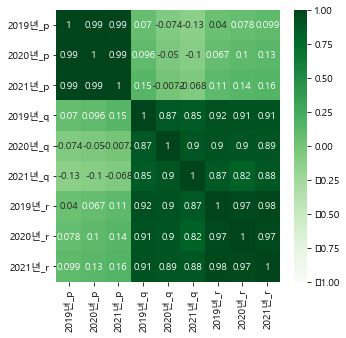

In [41]:
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(df_corr_new_corr.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )